In [ ]:
!git clone https://github.com/AntonioTepsich/Convolutional-KANs.git

Cloning into 'Convolutional-KANs'...
remote: Enumerating objects: 1528, done.
remote: Counting objects: 100% (374/374), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 1528 (delta 248), reused 345 (delta 221), pack-reused 1154
Receiving objects: 100% (1528/1528), 33.37 MiB | 8.52 MiB/s, done.
Resolving deltas: 100% (722/722), done.


In [ ]:
%cd /content/Convolutional-KANs

/content/Convolutional-KANs


In [ ]:
from kan_convolutional.KANConv import KAN_Convolutional_Layer

In [ ]:
from tqdm import tqdm

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

# Assuming 'KAN_Convolutional_Layer' is imported and properly defined as in your previous snippets.
from kan_convolutional.KANConv import KAN_Convolutional_Layer

class KANC_MLP(nn.Module):
    def __init__(self, device: str = 'cpu'):
        super().__init__()

        # Define the first KAN convolutional layer
        self.conv1 = KAN_Convolutional_Layer(
            n_convs=5,
            kernel_size=(3, 3),
            stride=(1, 1),
            padding=(1, 1),  # Padding set to 'same' to maintain dimension
            device=device
        )

        # Define the second KAN convolutional layer
        self.conv2 = KAN_Convolutional_Layer(
            n_convs=5,
            kernel_size=(3, 3),
            stride=(1, 1),
            padding=(1, 1),  # Padding set to 'same' to maintain dimension
            device=device
        )

        # Pooling layer to reduce spatial dimensions
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))

        # Flatten the output from convolutional layers to feed into fully connected layers
        self.flat = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(1225, 256)   # Adjusted based on assumed output dimension
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Pass input through the first KAN convolutional layer and pooling
        x = self.conv1(x)
        x = self.pool(x)

        # Pass through the second KAN convolutional layer and pooling
        x = self.conv2(x)
        x = self.pool(x)

        # Flatten and pass through fully connected layers
        x = self.flat(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)

# Input size: torch.Size([64, 1, 28, 28])
# After Conv1: torch.Size([64, 5, 28, 28])
# After Pool1: torch.Size([64, 5, 14, 14])
# After Conv2: torch.Size([64, 25, 14, 14])
# After Pool2: torch.Size([64, 25, 7, 7])
# After Flatten: torch.Size([64, 1225])
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Assuming your KANC_MLP is defined and imported
# from your_kan_module import KANC_MLP  # Uncomment and modify this line if your model is in a separate file

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Model
model = KANC_MLP(device=device).to(device)

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model

def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        # Initialize tqdm progress bar
        with tqdm(total=len(train_loader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch') as pbar:
            for images, labels in train_loader:
                images = images.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(images)
                loss = criterion(outputs, labels)

                # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                # Update tqdm bar with the latest loss and iteration count
                pbar.set_postfix(loss=f'{loss.item():.4f}')
                pbar.update()

        # Calculate the average loss over all batches and print
        average_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{num_epochs} completed. Average Loss: {average_loss:.4f}')


# Train the model
train_model(num_epochs=5)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11325106.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 337327.61it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3124195.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9689994.29it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5: 100%|██████████| 938/938 [01:57<00:00,  7.96batch/s, loss=0.0848]


Epoch 1/5 completed. Average Loss: 0.2275


Epoch 2/5: 100%|██████████| 938/938 [01:54<00:00,  8.18batch/s, loss=0.0734]


Epoch 2/5 completed. Average Loss: 0.0563


Epoch 3/5: 100%|██████████| 938/938 [01:54<00:00,  8.22batch/s, loss=0.0521]


Epoch 3/5 completed. Average Loss: 0.0385


Epoch 4/5: 100%|██████████| 938/938 [01:54<00:00,  8.21batch/s, loss=0.0035]


Epoch 4/5 completed. Average Loss: 0.0297


Epoch 5/5: 100%|██████████| 938/938 [01:54<00:00,  8.17batch/s, loss=0.0017]

Epoch 5/5 completed. Average Loss: 0.0210


In [ ]:
# Function to evaluate the model
def evaluate_model():
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')


# Evaluate the model
evaluate_model()

Accuracy of the model on the 10000 test images: 98.68%


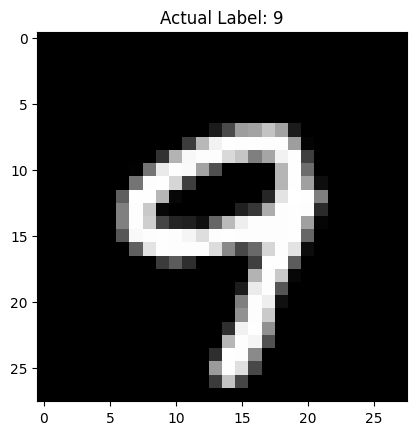

Predicted Label: 9


In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np
import random
def get_random_image(loader):
    images, labels = next(iter(loader))
    idx = random.randint(0, len(images) - 1)  # Random index in the batch
    return images[idx], labels[idx]


def show_image(image, label):
    image = image.numpy().squeeze()  # Remove extra dimensions
    plt.imshow(image, cmap='gray')
    plt.title(f'Actual Label: {label}')
    plt.show()

def predict_single_image(model, device, image):
    model.eval()
    image = image.unsqueeze(0).to(device)  # Add batch dimension and send to device
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

image, label = get_random_image(test_loader)

show_image(image, label)

# Predict the label
predicted_label = predict_single_image(model, device, image)
print(f'Predicted Label: {predicted_label}')